# Homework PCA

## Subtask 1


In [1]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### • Plot the first 3 columns of the Data Set and the target column in a 3d scatter plot

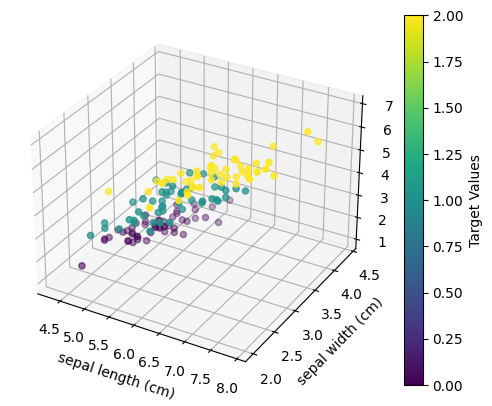

In [4]:
x = df.iloc[:, 0].values
y = df.iloc[:, 1].values
z = df.iloc[:, 2].values

# Extract the target column as colors
colors = df['target'].values

# Create a figure and a 3D subplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the data points using the first 3 columns as coordinates and colors based on the target column
scatter = ax.scatter(x, y, z, c=colors, cmap='viridis')

# Set labels for the axes
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_zlabel('petal length (cm)')

# Add a colorbar to indicate the mapping from colors to target values
cbar = plt.colorbar(scatter)
cbar.set_label('Target Values')

# Show the 3D scatter plot
plt.show()

### Copy the implementation of the Principal Component Analysis algorithm from SMLH.

In [10]:
import numpy as np

class myPCA:
    def __init__(self, n_components: int = 2, method: str = 'svd') -> None:
        '''
        The constructor of the PCA algorithm.
        
        :param n_components: int, default=2
            The dimension to which the data will be reduced.
        :param method: str, default='svd'
            The method used by PCA to reduce the dimensionality of the data.
        '''
        self.__n_components = n_components
        if method in ['svd', 'eigen']:
            self.__method = method
        else:
            raise ValueError(f"'{method}' is not a method implemented in this model")

    def fit(self, X: np.array):
        '''
        The fitting method.
        
        :param X: np.array
            The data on which we want to fit the PCA
        '''
        if self.__method == 'svd':
            U, S, V = np.linalg.svd(X)
            self.__V = V[:self.__n_components, :]
        elif self.__method == 'eigen':
            corr_mat = np.corrcoef(X.T)
            
            # Getting the eigenvectors and eigenvalues
            self.eig_vals, self.eig_vecs = np.linalg.eig(corr_mat)
            
            # Sorting the list of tuples (eigenvalue, eigenvector)
            self.eig_pairs = [(np.abs(self.eig_vals[i]), self.eig_vecs[:, i]) for i in range(len(self.eig_vals))]
            self.eig_pairs.sort(key=lambda x: x[0], reverse=True)
            
            # Calculating the explained variance ratio
            total = sum(self.eig_vals)
            self.explained_variance_ratio = [(i / total) * 100 for i in sorted(self.eig_vals, reverse=True)]
            self.cumulative_variance_ratio = np.cumsum(self.explained_variance_ratio)
            
            # Creating the projection matrix
            self.matrix_w = np.hstack([self.eig_pairs[i][1].reshape(np.size(X, 1), 1) for i in range(self.__n_components)])

        return self

    def transform(self, X: np.array) -> np.array:
        '''
        The transform function.
        
        :param X: np.array
            The data that we must reduce.
        '''
        if self.__method == 'svd':
            return X.dot(self.__V.T)
        elif self.__method == 'eigen':
            return X.dot(self.matrix_w)


In [27]:
X=pd.DataFrame(data.data)
y=data.target
y



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Create an instance of the Scratch-made PCA algorithm using the eigenvector algorithm.

In [28]:
eigen_pca = myPCA(n_components=2, method='eigen')

###  Create an instance of the Scratch-made PCA algorithm using the SVD algorithm.

In [29]:
svd_pca = myPCA(n_components=2, method='svd')

### Create an instance of sklearn and implement a PCA algorithm

In [30]:
sklearn_pca = PCA(n_components = 2)

####  Apply StandardScaler from sklearn on the data.

In [31]:
# Apply StandardScaler to the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# Fit and transform the data using your custom PCA instances
eigen_pca.fit(X_scaled)
eigen_transformed_data = eigen_pca.transform(X_scaled)

svd_pca.fit(X_scaled)
svd_transformed_data = svd_pca.transform(X_scaled)

# Fit and transform the data using scikit-learn's PCA
sklearn_transformed_data = sklearn_pca.fit_transform(X_scaled)

In [33]:
# Create three separate datasets
eigen_dataset = np.hstack((eigen_transformed_data, y.reshape(-1, 1)))
svd_dataset = np.hstack((svd_transformed_data, y.reshape(-1, 1)))
sklearn_dataset = np.hstack((sklearn_transformed_data, y.reshape(-1, 1)))

### Creating the plots

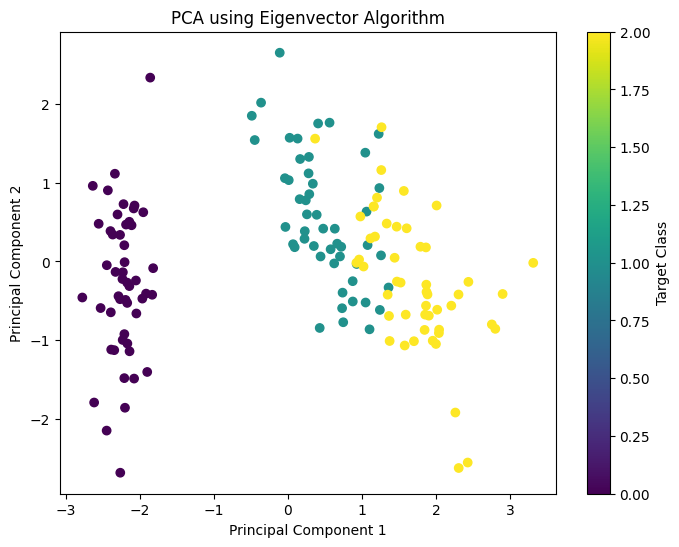

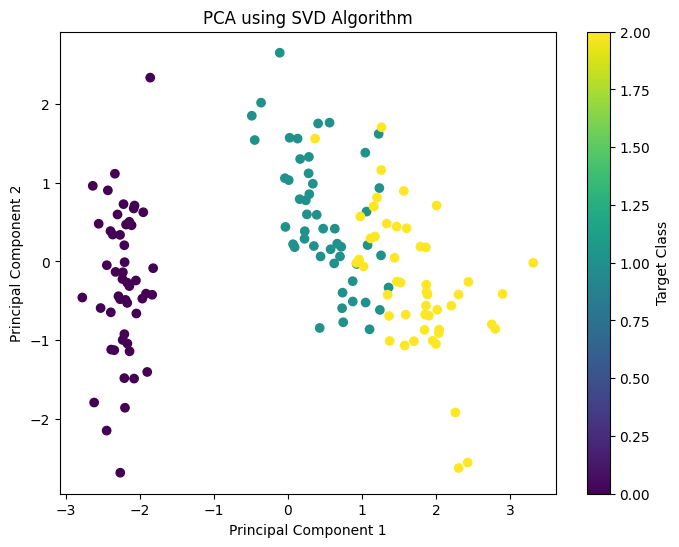

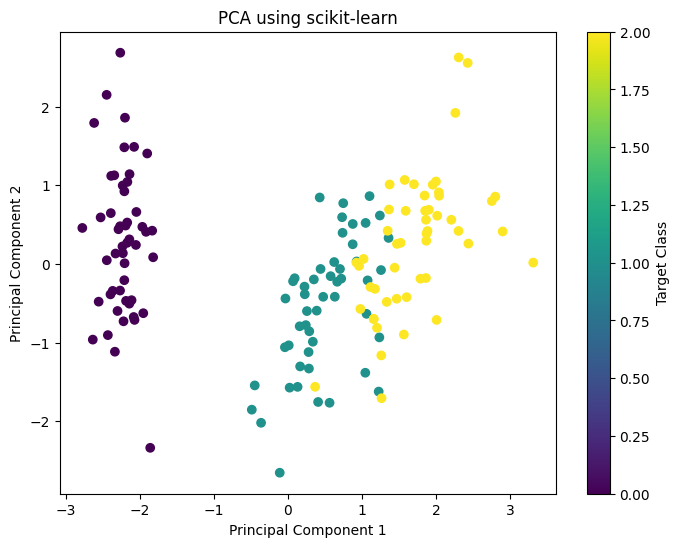

In [34]:
# Create scatter plots for each PCA version
def create_scatter_plot(data, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=data[:, 2], cmap='viridis')
    plt.colorbar(label='Target Class')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Create scatter plots for each dataset
create_scatter_plot(eigen_dataset, 'PCA using Eigenvector Algorithm')
create_scatter_plot(svd_dataset, 'PCA using SVD Algorithm')
create_scatter_plot(sklearn_dataset, 'PCA using scikit-learn')


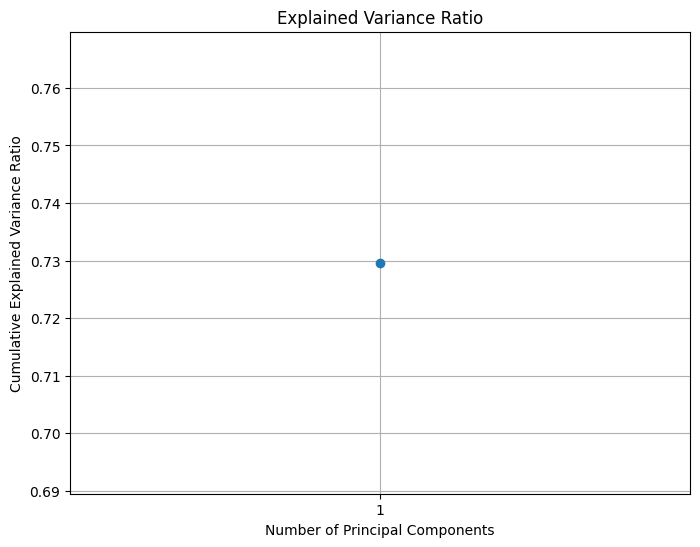

In [36]:
# Create an instance of scikit-learn's PCA with n_components=1
pca = PCA(n_components=1)

# Fit and transform the data using PCA
X_pca = pca.fit_transform(X_scaled)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a line plot of the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

when i run the pca with n components set to 1 i have only 1 principal component thats why the grphic shows only 1 point

# Subtask 2

In [41]:
from sklearn.datasets import load_digits

data = load_digits()

#####  Second plot in a multiple window plot 10 random digits with a titlehaving the digit from the image on a 2 x 5 grid.

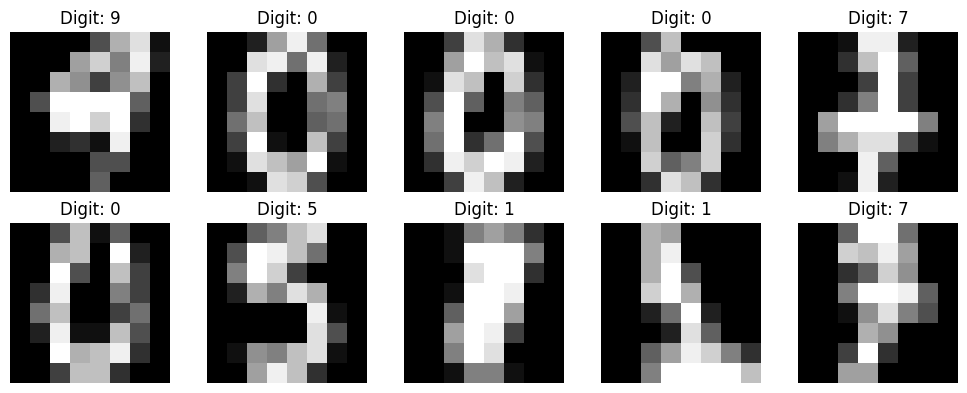

In [46]:
import random 

images = data.images
labels = data.target

# Create a 2x5 grid of subplots
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

# Randomly select 10 indices for the digits to display
random_indices = random.sample(range(len(images)), 10)

# Loop through the subplots and plot random digits with titles
for i, ax in enumerate(axes.flat):
    index = random_indices[i]
    digit_image = images[index]
    digit_label = labels[index]

    ax.imshow(digit_image, cmap='gray')
    ax.set_title(f'Digit: {digit_label}')
    ax.axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

####  Create an instance of the sklearn PCA. and applying scalling

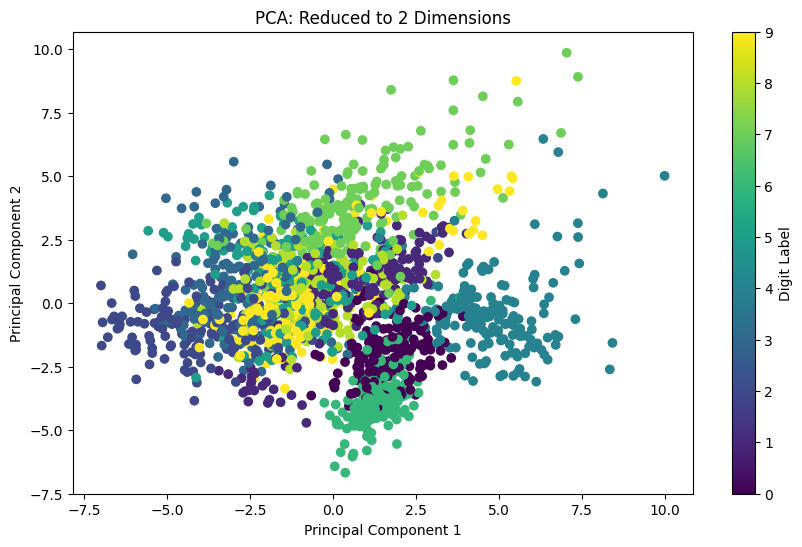

In [48]:
# Get the digit data
X = data.data  
y = data.target

# Apply StandardScaler to the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create an instance of scikit-learn's PCA
pca = PCA(n_components = 2)

# Fit and transform the data using PCA to reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

# Create a scatter plot of the reduced data with colors based on the digit labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.colorbar(scatter, label='Digit Label')
plt.title('PCA: Reduced to 2 Dimensions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()